# Stock market Indices

In [2]:
library('dplyr')
library('ggplot2')
library('ggrepel')
library('xtable')
library('tidyr')
library('xtable')
library('purrr')
library('readr')
library('tseries')
#install.packages('flextable')
library('kableExtra')
options("scipen"=100, "digits"=4)
library('flextable')

In [4]:
indexes <- read.csv('./2005/df_Indexes_2005.csv')

In [5]:
df_indexes <- indexes %>% 
    pivot_longer(!Date, names_to = 'index', values_to='price') %>% 
    mutate(index = substring(index, 3, 10),
           Date = as.Date(Date, format='%Y-%m-%d'))

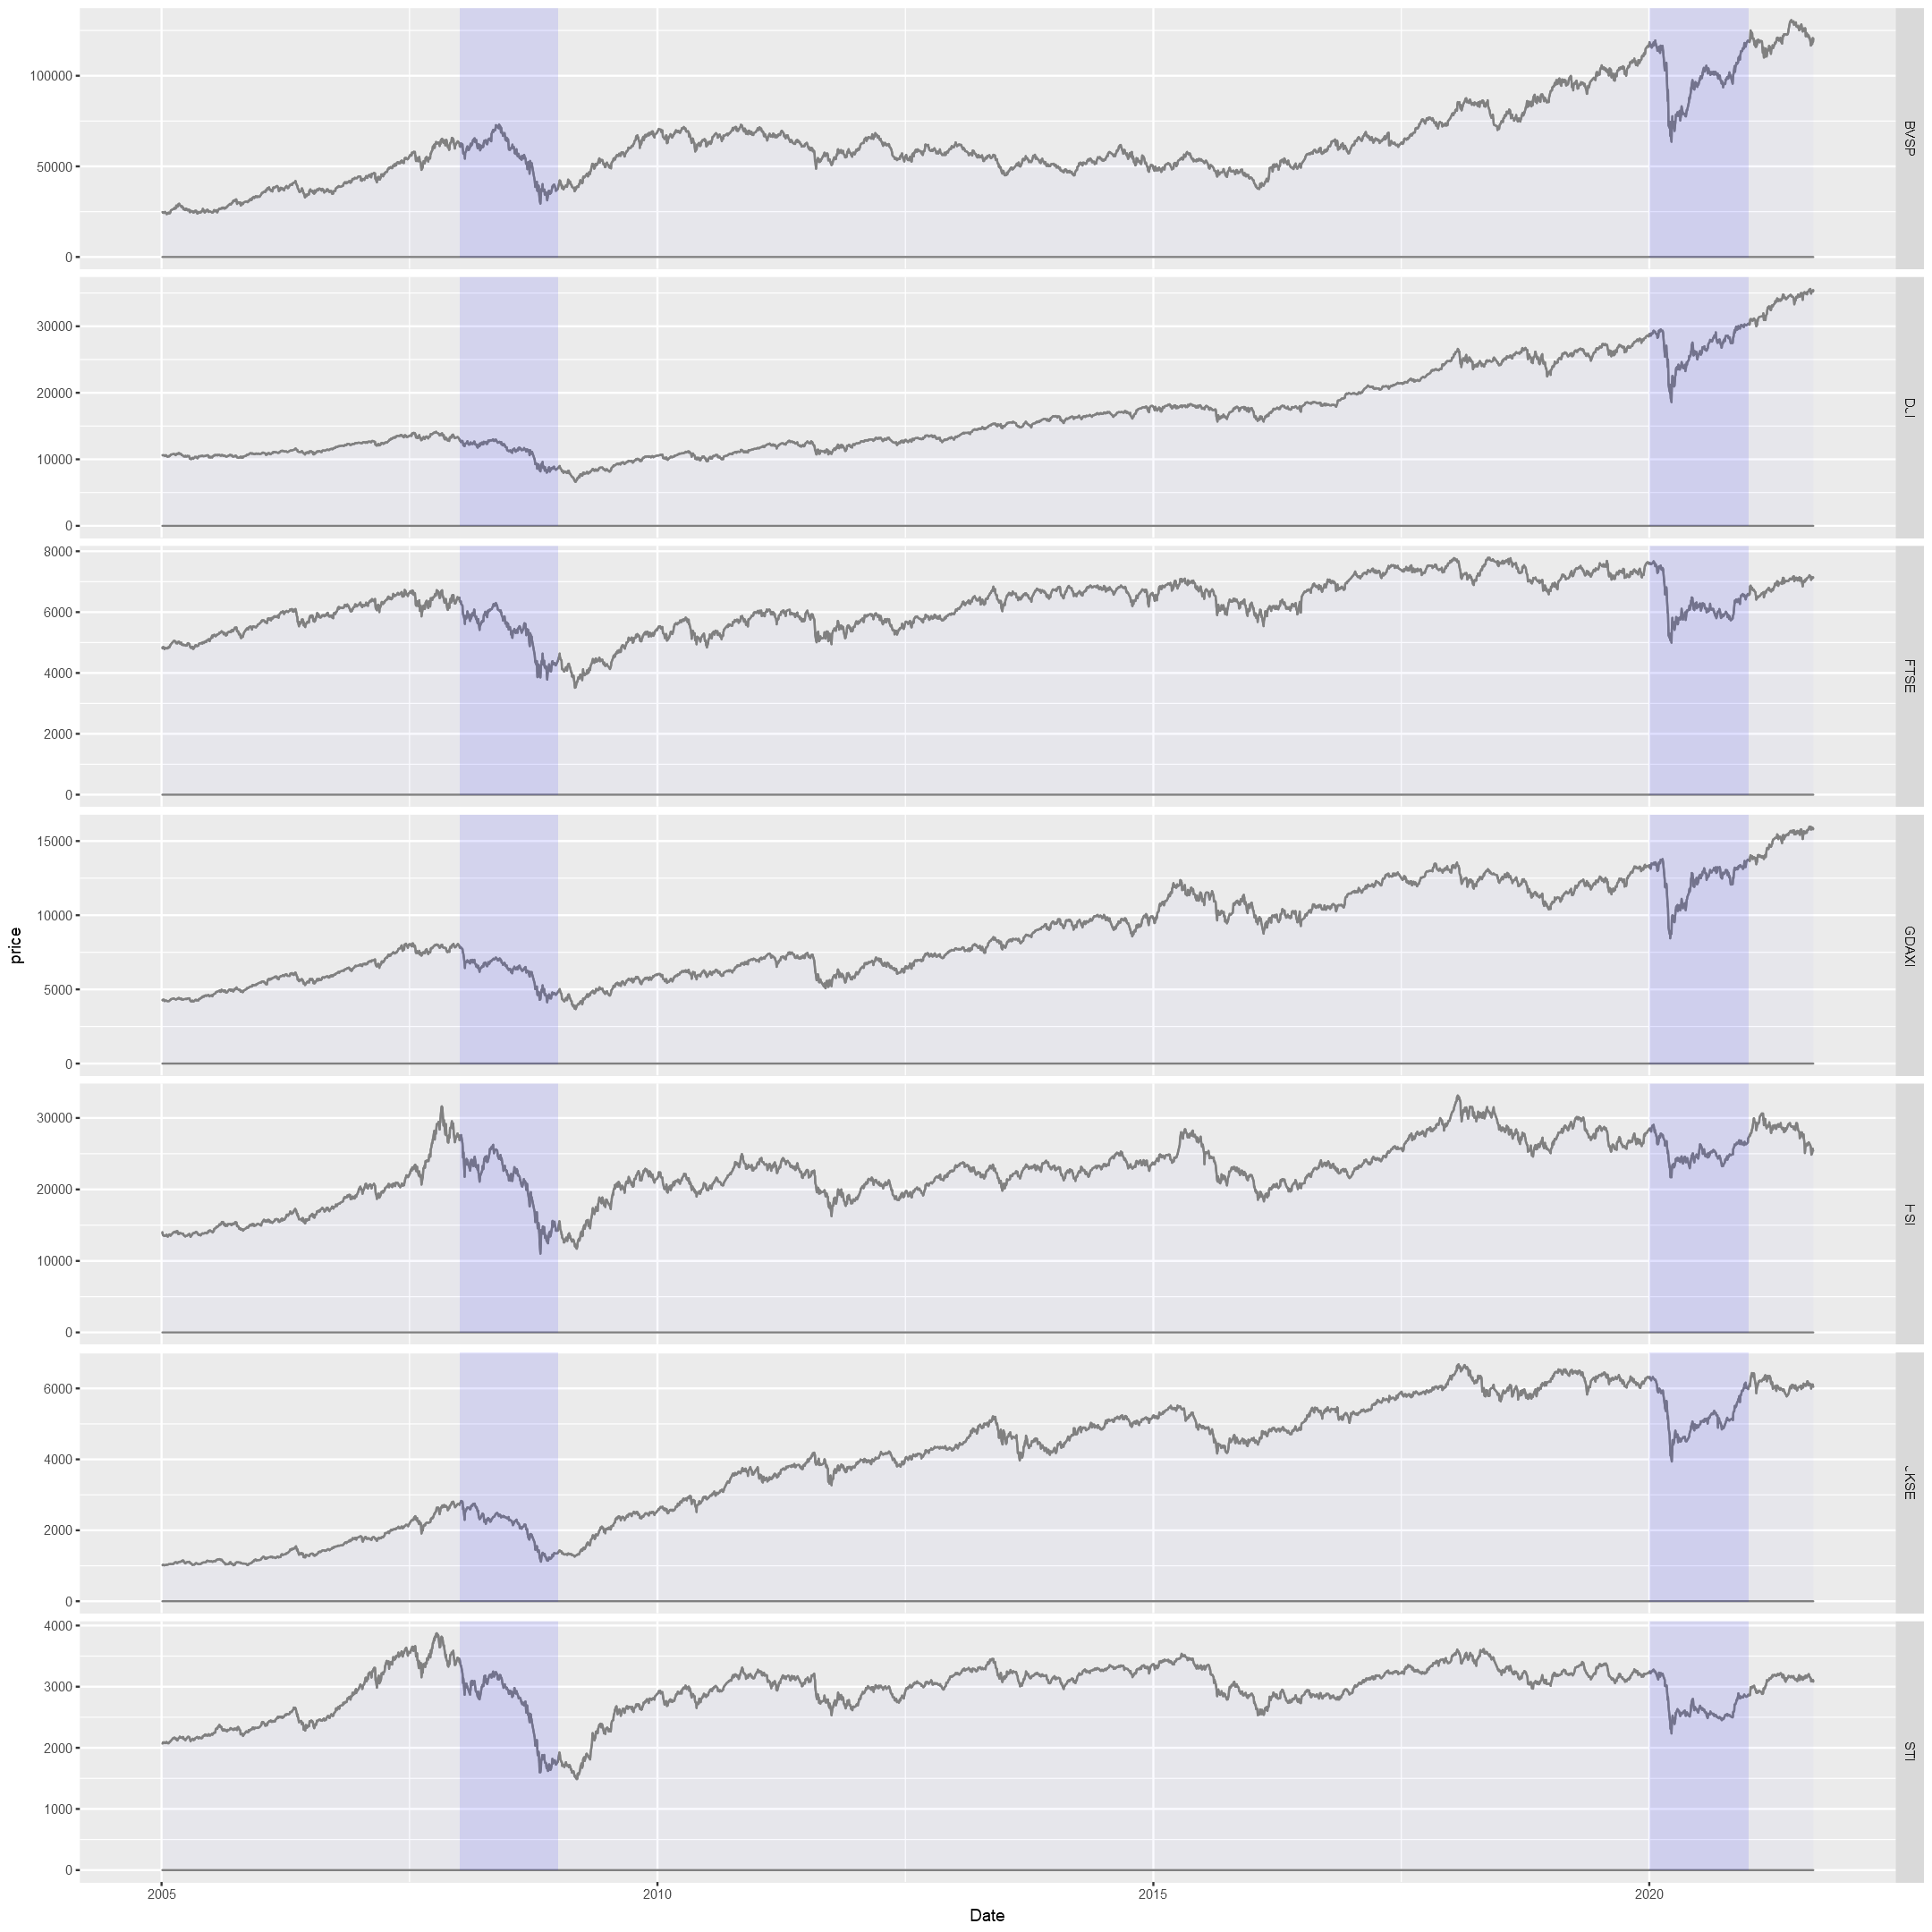

In [6]:
options(repr.plot.width=18, repr.plot.height=18)
p3 <- ggplot(df_indexes, aes(x= Date,y= price, col=index)) +
    geom_line() +
    facet_grid(row=vars(index), scale='free') +
    scale_color_grey(start=0.5, end=0.5) +
    geom_ribbon(aes(ymin=0, ymax=price), fill="blue", alpha=0.02) +
    #geom_area(aes(xmin = as.Date('2008-01-04'), xmax = as.Date('2009-08-30'), ymin = Inf, ymax = Inf), fill = "blue") 
    annotate("rect", xmin = as.Date('2008-01-04'), xmax = as.Date('2008-12-31'), ymin = 0, ymax = Inf,
    alpha = .1, fill='blue') +
    annotate("rect", xmin = as.Date('2020-01-04'), xmax = as.Date('2020-12-31'), ymin = 0, ymax = Inf,
    alpha = .1, fill='blue') +
    theme(legend.position = "none")
p3    